In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

from squlearn import Executor
from squlearn.encoding_circuit import QiskitEncodingCircuit
from squlearn.observables import SinglePauli
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam, SLSQP, SGLBO

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


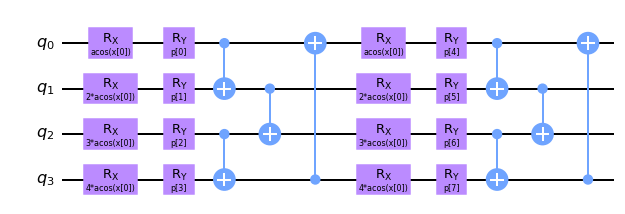

In [2]:
nqubits = 4

qc = QuantumCircuit(4)
p = ParameterVector('p', 8)
x = ParameterVector('x', 1)

p2 = np.array([-0.13005136, -1.34331017,  2.44392299, 1.64405423, -0.36315523, 0.45344925,
  0.18577077, -0.13904446])

qc.rx(1*np.arccos(x[0]), 0)
qc.rx(2*np.arccos(x[0]), 1)
qc.rx(3*np.arccos(x[0]), 2)
qc.rx(4*np.arccos(x[0]), 3)

qc.ry(p[0], 0)
qc.ry(p[1], 1)
qc.ry(p[2], 2)
qc.ry(p[3], 3)

qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(1, 2)
qc.cx(3, 0)

qc.rx(1*np.arccos(x[0]), 0)
qc.rx(2*np.arccos(x[0]), 1)
qc.rx(3*np.arccos(x[0]), 2)
qc.rx(4*np.arccos(x[0]), 3)

qc.ry(p[4], 0)
qc.ry(p[5], 1)
qc.ry(p[6], 2)
qc.ry(p[7], 3)

qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(1, 2)
qc.cx(3, 0)


pqc = QiskitEncodingCircuit(qc)
pqc.draw()

In [3]:
op = SinglePauli(nqubits,qubit=0,parameterized=True)
print(op)

SparsePauliOp(['IIIZ'],
              coeffs=[ParameterExpression(1.0*p[0])])


In [4]:
op.num_parameters

1

In [5]:
# Randomly initialize parameters of the encoding circuit
np.random.seed(13)
param_ini =  np.random.rand(pqc.num_parameters)
# Initialize parameters of the observable as ones
param_op_ini = np.ones(op.num_parameters)
x0 = [[i * 0.3] for i in range(15)]
optimizer_options = {"bo_aqc_func": "EI", "bo_aqc_optimizer": "lbfgs", "bo_bounds": [(0.0, 5.0)], "log_file": "sglbo_noiseless.log",
                     "bo_n_calls": 30, "bo_x0_points": x0, "maxiter": 100}

qnn_simulator = QNNRegressor(
    pqc,
    op,
    Executor("statevector_simulator"),
    SquaredLoss(),
    SGLBO(optimizer_options),
    #SLSQP(),
    #Adam({"lr": 0.2,"log_file": "adam_noiseless.log"}),
    param_ini,
    param_op_ini=param_op_ini,
    opt_param_op=True, # Keine Observablen optimierung
    parameter_seed=124
)

In [6]:
# Data that is inputted to the QNN
x_train = np.arange(-0.5, 0.6, 0.1)
# Data that is fitted by the QNN
y_train = np.sin(6.0*x_train)

In [7]:
qnn_simulator.fit(x_train, y_train)

fit:   0%|          | 0/100 [00:00<?, ?it/s]BOP  fval:  2.7741112626685394  x:  [0.0]
BOP  fval:  1.7441915239498105  x:  [0.3]
BOP  fval:  3.527277787459792  x:  [0.6]
BOP  fval:  5.564519800642346  x:  [0.8999999999999999]
BOP  fval:  2.9734965076692443  x:  [1.2]
BOP  fval:  2.2716917132042513  x:  [1.5]
BOP  fval:  20.593265190761418  x:  [1.7999999999999998]
BOP  fval:  59.48692929907424  x:  [2.1]
BOP  fval:  90.5907622865777  x:  [2.4]
BOP  fval:  85.62017701806771  x:  [2.6999999999999997]
BOP  fval:  53.68444914195017  x:  [3.0]
BOP  fval:  27.16218560332119  x:  [3.3]
BOP  fval:  19.245589209718723  x:  [3.5999999999999996]
BOP  fval:  27.479917094365298  x:  [3.9]
BOP  fval:  68.32998950065662  x:  [4.2]
BOP  fval:  57.79544208850107  x:  [2.964223091125092]
BOP  fval:  73.10906521466822  x:  [4.221328742905087]
BOP  fval:  90.14942264342751  x:  [4.289728088113785]
BOP  fval:  76.60890466923203  x:  [4.236258693920628]
BOP  fval:  41.17705096394308  x:  [3.117818483929862]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.23822343586884093  x:  [0.07051214898021138]
 Iteration:  3 :  gp_minimize:  fval:  0.2375853036746371  x:  [0.0623987246236474] 
BOP  fval:  0.2375853036746371  x:  [0.0]
BOP  fval:  0.2510930431634763  x:  [0.3]
BOP  fval:  0.43223078481037785  x:  [0.6]
BOP  fval:  0.7057828160645188  x:  [0.8999999999999999]
BOP  fval:  1.0226882831961344  x:  [1.2]
BOP  fval:  1.3573609663575343  x:  [1.5]
BOP  fval:  1.6985515626271264  x:  [1.7999999999999998]
BOP  fval:  2.0380832506321265  x:  [2.1]
BOP  fval:  2.3623650740486064  x:  [2.4]
BOP  fval:  2.650213695064163  x:  [2.6999999999999997]
BOP  fval:  2.877719097847633  x:  [3.0]
BOP  fval:  3.027795004821441  x:  [3.3]
BOP  fval:  3.0999214554285226  x:  [3.5999999999999996]
BOP  fval:  3.1152976245685626  x:  [3.9]
BOP  fval:  3.1143153527390197  x:  [4.2]
BOP  fval:  2.8544387614168465  x:  [2.964223091125092]
BOP  fval:  3.114917976336311  x:  [4.221328742905087]
BOP  fval:  3.11820030544429  x:  [4.289728088113785]
BOP

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.21704810503902272  x:  [0.0]
BOP  fval:  0.19896491661673474  x:  [0.07597384745659615]
 Iteration:  5 :  gp_minimize:  fval:  0.1985107147347471  x:  [0.06998867663168964] 
BOP  fval:  0.1985107147347471  x:  [0.0]
BOP  fval:  0.23518365137490657  x:  [0.3]
BOP  fval:  0.4915183261835379  x:  [0.6]
BOP  fval:  0.9170540183238687  x:  [0.8999999999999999]
BOP  fval:  1.4678404673747056  x:  [1.2]
BOP  fval:  2.1088893350438074  x:  [1.5]
BOP  fval:  2.812863232191539  x:  [1.7999999999999998]
BOP  fval:  3.5562367096796557  x:  [2.1]
BOP  fval:  4.314955997725966  x:  [2.4]
BOP  fval:  5.061718143526428  x:  [2.6999999999999997]
BOP  fval:  5.766345746347008  x:  [3.0]
BOP  fval:  6.399554684016377  x:  [3.3]
BOP  fval:  6.939084938580588  x:  [3.5999999999999996]
BOP  fval:  7.376133903595053  x:  [3.9]
BOP  fval:  7.7196569496202665  x:  [4.2]
BOP  fval:  5.685529534283288  x:  [2.964223091125092]
BOP  fval:  7.741128282362731  x:  [4.221328742905087]
BOP  fval:  7.8078

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.1985107147347471  x:  [0.0]
 Iteration:  6 :  gp_minimize:  fval:  0.18354255701216354  x:  [0.08561252149690292] 
BOP  fval:  0.18354255701216354  x:  [0.0]
BOP  fval:  0.22153621200853862  x:  [0.3]
BOP  fval:  0.5231396538723856  x:  [0.6]
BOP  fval:  1.144401293423898  x:  [0.8999999999999999]
BOP  fval:  2.1427611403201645  x:  [1.2]
BOP  fval:  3.5564866449026926  x:  [1.5]
BOP  fval:  5.384805594227895  x:  [1.7999999999999998]
BOP  fval:  7.573128018799459  x:  [2.1]
BOP  fval:  10.006832376756853  x:  [2.4]
BOP  fval:  12.515560455477047  x:  [2.6999999999999997]
BOP  fval:  14.888156580333952  x:  [3.0]
BOP  fval:  16.896616347490806  x:  [3.3]
BOP  fval:  18.32591608232845  x:  [3.5999999999999996]
BOP  fval:  19.005525414766645  x:  [3.9]
BOP  fval:  18.83784911512645  x:  [4.2]
BOP  fval:  14.61986153939387  x:  [2.964223091125092]
BOP  fval:  18.792941013158625  x:  [4.221328742905087]
BOP  fval:  18.619832766495804  x:  [4.289728088113785]
BOP  fval:  18.75

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.1699468110012442  x:  [0.11619731596161821]
 Iteration:  7 :  gp_minimize:  fval:  0.1697518605645913  x:  [0.10253839105829696] 
BOP  fval:  0.1697518605645913  x:  [0.0]
BOP  fval:  0.25174841790407876  x:  [0.3]
BOP  fval:  0.6513956661919886  x:  [0.6]
BOP  fval:  1.2976853279473115  x:  [0.8999999999999999]
BOP  fval:  2.107639354998748  x:  [1.2]
BOP  fval:  2.998682590623739  x:  [1.5]
BOP  fval:  3.89815393657983  x:  [1.7999999999999998]
BOP  fval:  4.748829722383353  x:  [2.1]
BOP  fval:  5.510499702945798  x:  [2.4]
BOP  fval:  6.158625062544859  x:  [2.6999999999999997]
BOP  fval:  6.681664061973171  x:  [3.0]
BOP  fval:  7.078654133975844  x:  [3.3]
BOP  fval:  7.358131896002209  x:  [3.5999999999999996]
BOP  fval:  7.538642895755986  x:  [3.9]
BOP  fval:  7.650217095370849  x:  [4.2]
BOP  fval:  6.62597778776229  x:  [2.964223091125092]
BOP  fval:  7.656568779208345  x:  [4.221328742905087]
BOP  fval:  7.676218810724464  x:  [4.289728088113785]
BOP  fval:  7

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.157393388498541  x:  [0.08009466593260212]
 Iteration:  8 :  gp_minimize:  fval:  0.157393388498541  x:  [0.08009466593260212] 
BOP  fval:  0.157393388498541  x:  [0.0]
BOP  fval:  0.2042080967317993  x:  [0.3]
BOP  fval:  0.5080453094279804  x:  [0.6]
BOP  fval:  1.1123008287485243  x:  [0.8999999999999999]
BOP  fval:  2.062436860097281  x:  [1.2]
BOP  fval:  3.3921463111909813  x:  [1.5]
BOP  fval:  5.109149765866326  x:  [1.7999999999999998]
BOP  fval:  7.183267591150746  x:  [2.1]
BOP  fval:  9.5391033014668  x:  [2.4]
BOP  fval:  12.055022680298821  x:  [2.6999999999999997]
BOP  fval:  14.56923990548862  x:  [3.0]
BOP  fval:  16.892849812732056  x:  [3.3]
BOP  fval:  18.82867712281584  x:  [3.5999999999999996]
BOP  fval:  20.19393098608966  x:  [3.9]
BOP  fval:  20.84393145090107  x:  [4.2]
BOP  fval:  14.27555343020125  x:  [2.964223091125092]
BOP  fval:  20.86024285087495  x:  [4.221328742905087]
BOP  fval:  20.884862738508634  x:  [4.289728088113785]
BOP  fval:  2

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.1468202966523507  x:  [0.10528435757630425]
BOP  fval:  0.14678301821123022  x:  [0.10415549334618965]
 Iteration:  9 :  gp_minimize:  fval:  0.1466752321005258  x:  [0.08388966659270938] 
BOP  fval:  0.1466752321005258  x:  [0.0]
BOP  fval:  0.1721299375812587  x:  [0.3]
BOP  fval:  0.3528634189892424  x:  [0.6]
BOP  fval:  0.6673830166202709  x:  [0.8999999999999999]
BOP  fval:  1.0914379052815488  x:  [1.2]
BOP  fval:  1.6007715430499958  x:  [1.5]
BOP  fval:  2.1732134280785993  x:  [1.7999999999999998]
BOP  fval:  2.789872396933688  x:  [2.1]
BOP  fval:  3.4353654006875574  x:  [2.4]
BOP  fval:  4.097193149400243  x:  [2.6999999999999997]
BOP  fval:  4.764527609441449  x:  [3.0]
BOP  fval:  5.426780137737375  x:  [3.3]
BOP  fval:  6.072355052370172  x:  [3.5999999999999996]
BOP  fval:  6.6879547207100405  x:  [3.9]
BOP  fval:  7.25869428396525  x:  [4.2]
BOP  fval:  4.68499797955224  x:  [2.964223091125092]
BOP  fval:  7.29715469522574  x:  [4.221328742905087]
BOP  f

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.1281877935766212  x:  [0.08325917186738227]
BOP  fval:  0.1281576803979512  x:  [0.08202194554763258]
BOP  fval:  0.1281254221030792  x:  [0.08039731134801184]
 Iteration:  11 :  gp_minimize:  fval:  0.1281254221030792  x:  [0.08039731134801184] 
BOP  fval:  0.1281254221030792  x:  [0.0]
BOP  fval:  0.16364499482355038  x:  [0.3]
BOP  fval:  0.3643647710815833  x:  [0.6]
BOP  fval:  0.7117374637367837  x:  [0.8999999999999999]
BOP  fval:  1.1817309821147164  x:  [1.2]
BOP  fval:  1.7472873562877986  x:  [1.5]
BOP  fval:  2.3806573946978564  x:  [1.7999999999999998]
BOP  fval:  3.055365436941368  x:  [2.1]
BOP  fval:  3.7476300894425516  x:  [2.4]
BOP  fval:  4.437158202082456  x:  [2.6999999999999997]
BOP  fval:  5.107327784043724  x:  [3.0]
BOP  fval:  5.744867299343781  x:  [3.3]
BOP  fval:  6.339210897306856  x:  [3.5999999999999996]
BOP  fval:  6.881751303096154  x:  [3.9]
BOP  fval:  7.365218089095312  x:  [4.2]
BOP  fval:  5.028887231156193  x:  [2.964223091125092]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.1281254221030792  x:  [0.0]
BOP  fval:  0.12061811370677838  x:  [0.08832273848897455]
 Iteration:  12 :  gp_minimize:  fval:  0.12061811370677838  x:  [0.08832273848897455] 
BOP  fval:  0.12061811370677838  x:  [0.0]
BOP  fval:  0.1596191505282014  x:  [0.3]
BOP  fval:  0.38316251707844884  x:  [0.6]
BOP  fval:  0.8138994334387162  x:  [0.8999999999999999]
BOP  fval:  1.4769959633643752  x:  [1.2]
BOP  fval:  2.395908737461539  x:  [1.5]
BOP  fval:  3.5875783053794446  x:  [1.7999999999999998]
BOP  fval:  5.057572450319823  x:  [2.1]
BOP  fval:  6.795735487614084  x:  [2.4]
BOP  fval:  8.772873304979267  x:  [2.6999999999999997]
BOP  fval:  10.938933160976498  x:  [3.0]
BOP  fval:  13.223028389117106  x:  [3.3]
BOP  fval:  15.535517158233981  x:  [3.5999999999999996]
BOP  fval:  17.772176912266943  x:  [3.9]
BOP  fval:  19.820328329112932  x:  [4.2]
BOP  fval:  10.67284408416335  x:  [2.964223091125092]
BOP  fval:  19.955757105406292  x:  [4.221328742905087]
BOP  fval:  

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.10803080350909361  x:  [0.07029571707980631]
 Iteration:  14 :  gp_minimize:  fval:  0.10803080350909361  x:  [0.07029571707980631] 
BOP  fval:  0.10803080350909361  x:  [0.0]
BOP  fval:  0.12100736186653413  x:  [0.3]
BOP  fval:  0.22462658153352308  x:  [0.6]
BOP  fval:  0.42891355333835285  x:  [0.8999999999999999]
BOP  fval:  0.7449265297374643  x:  [1.2]
BOP  fval:  1.1838649107437897  x:  [1.5]
BOP  fval:  1.7560338023347988  x:  [1.7999999999999998]
BOP  fval:  2.4697259730248797  x:  [2.1]
BOP  fval:  3.3300867604808504  x:  [2.4]
BOP  fval:  4.338029120854658  x:  [2.6999999999999997]
BOP  fval:  5.489265146219611  x:  [3.0]
BOP  fval:  6.773517537025633  x:  [3.3]
BOP  fval:  8.173970059693673  x:  [3.5999999999999996]
BOP  fval:  9.667010018757633  x:  [3.9]
BOP  fval:  11.222307998240252  x:  [4.2]
BOP  fval:  5.34472731839177  x:  [2.964223091125092]
BOP  fval:  11.334327303471875  x:  [4.221328742905087]
BOP  fval:  11.694285414040362  x:  [4.289728088113785

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.08573663358893843  x:  [0.005676802738430183]
BOP  fval:  0.08342614222167573  x:  [0.019986653414620074]
BOP  fval:  0.0832206716583526  x:  [0.02162284730139866]
BOP  fval:  0.08690827198584718  x:  [0.0]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


 Iteration:  19 :  gp_minimize:  fval:  0.0832206716583526  x:  [0.02162284730139866] 
BOP  fval:  0.0832206716583526  x:  [0.0]
BOP  fval:  0.11444337662017615  x:  [0.3]
BOP  fval:  0.2558948412095189  x:  [0.6]
BOP  fval:  0.5149481852326768  x:  [0.8999999999999999]
BOP  fval:  0.9002081354481293  x:  [1.2]
BOP  fval:  1.4210767727977602  x:  [1.5]
BOP  fval:  2.087188816137731  x:  [1.7999999999999998]
BOP  fval:  2.9077385772780406  x:  [2.1]
BOP  fval:  3.890727332171162  x:  [2.4]
BOP  fval:  5.04216549624946  x:  [2.6999999999999997]
BOP  fval:  6.365268414817451  x:  [3.0]
BOP  fval:  7.859687548707644  x:  [3.3]
BOP  fval:  9.520820142545276  x:  [3.5999999999999996]
BOP  fval:  11.339239931843307  x:  [3.9]
BOP  fval:  13.300288943087647  x:  [4.2]
BOP  fval:  6.198439417477975  x:  [2.964223091125092]
BOP  fval:  13.444647033548017  x:  [4.221328742905087]
BOP  fval:  13.911685688323328  x:  [4.289728088113785]
BOP  fval:  13.546061982523344  x:  [4.236258693920628]
BOP  f

In [1]:
print("Result encoding parameters:", qnn_simulator.param)
print("Result observable parameters:", qnn_simulator.param_op)

NameError: name 'qnn_simulator' is not defined

In [ ]:
x = np.arange(np.min(x_train), np.max(x_train) + 0.01, 0.01)
y = qnn_simulator.predict(x)  # function for evaluating the prediction of the QNN
plt.plot(x, np.sin(6.0*x), label="Parabola function")
plt.plot(x, y, label="QNN inference")
plt.plot(x_train, y_train, "x", label="training data")
plt.legend()
plt.title("QNN inference of a parabola function")
plt.show()